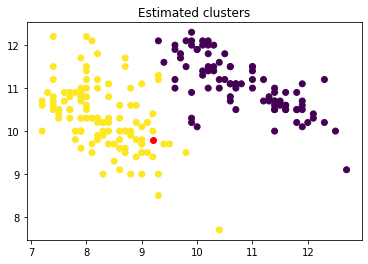

In [42]:
# ISC4221 - Lab 5
# by: Andres Candido
# Part 1:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

np.random.seed(69)

notes = np.loadtxt('banknotes-2.txt')
n_items = len(notes)

x = []
y = []
for i in range(n_items): 
  item = list(notes[i])
  x.append(item[3])
  y.append(item[4])

data = list(zip(x, y))


kmeans = KMeans(n_clusters=2, tol=0.01, init='random', n_init=2)  # init determines that centroid should be selected at random from sample, n_init determines the number of centroids
kmeans.fit(data)


plt.scatter(x, y, c=kmeans.labels_)
plt.scatter(9.2, 9.8, c = 'red')   # record given to determine if it is a forgery (it isn't)
plt.title("Estimated clusters")

plt.show()

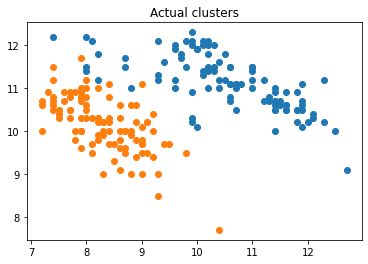

In [22]:
# ------------ compare with given forged and genuine datasets -----------------------

forge = np.loadtxt('bank_forge-2.txt')
genuine = np.loadtxt('bank_genuine-2.txt')
n_items = len(forge)

x_forge = []
y_forge = []

x_genuine = []
y_genuine = []

for i in range(n_items): 
  item_forge = list(forge[i])
  item_genuine = list(genuine[i])

  x_forge.append(item_forge[3])
  y_forge.append(item_forge[4])

  x_genuine.append(item_genuine[3])
  y_genuine.append(item_genuine[4])

data_forge = list(zip(x_forge, y_forge))
data_genuine = list(zip(x_genuine, y_genuine))

plt.scatter(x_forge, y_forge)
plt.scatter(x_genuine, y_genuine)
plt.title("Actual clusters")

plt.show()

Cluster variance at each # of clusters:
 [681.3706, 152.3479517603579, 78.851441426146, 57.255523809523815, 46.446182051282065, 39.03998724608726]


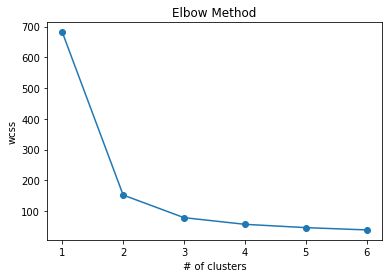

In [61]:
# Part 2:

np.random.seed(69)

raw_iris = np.loadtxt('iris-1.txt')

iris = raw_iris.tolist()
wcss = []

for i in range(1,7):
  kmeans = KMeans(n_clusters=i, init='random')
  kmeans.fit(iris)
  wcss.append(kmeans.inertia_)

print('Cluster variance at each # of clusters:\n', wcss)

plt.plot(range(1,7), wcss, marker='o') # Plot the total cluster variance versus k for k = 1, 2, 3, 4, 5, and 6.
plt.title('Elbow Method')
plt.xlabel('# of clusters')
plt.ylabel('wcss')
plt.show()

# The optimal choice of clusters should be K=3 (maybe k=4, but I'm more confident with k=3) since we can see that after k=3 convergence slows down quite a bit. 